# Project GEVPRO (H&M) - MAIN

We will work with the following dataset: 
Source: https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/overview
This dataset has been reduced to use less memory. Only sales data from > 08-01-2020 is selected. 

In [1]:
# Used libaries:
%matplotlib inline
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib.image as mpimg

from sklearn.metrics.pairwise import cosine_similarity
from tqdm.notebook import tqdm

## 0.  Research questions:
We try to answer the following main research question:“Can we use the H&M dataset to explore data about its latest fashion trends and customer base?” This main research question is devided into 3 sub categories“: 
1. Sales --> What is popular
2. Customer base --> Who is our customer?
3. Personalised Fashion reccomendation --> Can we reccomend products based on other customers

## 1.  Reducing the dataset: 
This is only ran on the default dataset (transactions_train.csv) found on kaggle to reduce the memory size to 91.3mb (instead of 3+gb).

In [2]:
# df = pd.read_csv('data/transactions_train.csv', low_memory=False)
# df['t_dat'] = pd.to_datetime(df['t_dat'])
# mask = df['t_dat'] > '08-01-2020'
# df_reduced = df.loc[mask]
# df_reduced.to_csv('C:\\Users\\Nils\\Jupyter Notebooks\\Project_gevpro\\transactions_reduced.csv')

In [6]:
# This loads the reduced transaction (sales) dataset.
customers = pd.read_csv('data/customers.csv', low_memory=False)
articles = pd.read_csv('data/articles.csv', low_memory=False)
transactions = pd.read_csv('data/transactions_reduced.csv', low_memory=False)

## 2. Exploring the data

#### 2.1 Exploring customers.csv

The following table will describe information contained in customers.csv:

| Column | Description |
| --- | --- |
| customer_id | A unique customer id |
| FN | ? |
| Active | Whether an account is active or not |
| club_member_status | Is member of H&M club |
| Fashion_news_frequency | If customers get notified about H&M news |
| age | The age of customers |

In [7]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [8]:
customers.describe()

,FN,Active,age
count,476930.0,464404.0,1.356119e+06
mean,1.0,1.0,3.638696e+01
std,0.0,0.0,1.431363e+01
min,1.0,1.0,1.600000e+01
25%,1.0,1.0,2.400000e+01
50%,1.0,1.0,3.200000e+01
75%,1.0,1.0,4.900000e+01
max,1.0,1.0,9.900000e+01


#### 2.2 Exploring articles.csv
This section will show the information contained in the articles.csv file.

In [9]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [10]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


#### 2.3 Exploring transactions.csv
This section will show the information contained in the transactions.csv file.

In [11]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-08-02,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,853474004,0.033881,2
1,2020-08-02,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865594003,0.013542,2
2,2020-08-02,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,865699001,0.025407,2
3,2020-08-02,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,822959001,0.050831,2
4,2020-08-02,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,888024005,0.084729,2


In [12]:
transactions.describe()

,article_id,price,sales_channel_id
count,1.993503e+06,1.993503e+06,1.993503e+06
mean,8.011889e+08,2.957675e-02,1.675810e+00
std,1.305485e+08,2.038062e-02,4.680714e-01
min,1.087750e+08,3.220339e-04,1.000000e+00
25%,7.542380e+08,1.693220e-02,1.000000e+00
50%,8.457900e+08,2.540678e-02,2.000000e+00
75%,8.895500e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.067797e-01,2.000000e+00


### 3. Exploring H&M's customer base

In the customer section of this project we have explored the following research questions: 
* What is the most frequent age of H&M customers? 
* What is the distribution of the ages of H&M customers? W
* What is the most frequent postal code? 
* How many customers have a club membership?
* What kind of fashion news frequency is most popular with what club membership?
* How many people receive fashion news? 
* What is the spread of fashion news in contrast to club member status? 
* What is the relation between receiving fashion news and the customers age?

We have expressed the data in different ways, varying from plots to tables. With this research, we try to create a better overview of the customers shopping at H&M.

In [13]:
df = pd.read_csv('data/customers.csv', low_memory=False)
df = df.dropna(subset=['age', 'postal_code'])  # drop rows with missing values in this column
df.shape

(1356119, 7)

#### 3.1 What is the most frequent age of H&M customers?

In [14]:
#What are the 10 most frequent ages?
df["age"].value_counts().head(10)

#The most frequent age is 21, and the most people shopping at H&M are between 20 and 30

21.0    67530
24.0    56124
20.0    55196
25.0    54989
23.0    54867
26.0    53658
22.0    51869
27.0    49134
28.0    44294
29.0    40697
Name: age, dtype: int64

#### 3.2 What is the distribution of the ages of H&M customers? 

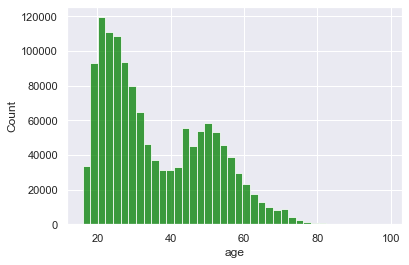

In [15]:
#What is the distribution of age?
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="age", data=df, color='green', bins=40)

#the distribution of age centers around 20/30 and 45/55.

#### 3.3 What is the most frequent postal code? 

In [16]:
#what are the 10 most frequent postal codes
df['postal_code'].value_counts().head(10)

#the most frequent postal code appears to be a value that gives 120303

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    118002
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       260
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       158
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       156
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       155
1f5bd429acc88fbbf24de844a59e438704aa8761bc7b99fd977cad297c50b74c       154
a1959a16bf167858c93a66ec2a330644512b25fb10f97eee2058549885af4dbd       138
9d5787501bf1c77592156ba51eab13f4a2670c807686431a9e22a69090b02358       138
087a46b65170845b4a55226ff1eb748ce7843d4b637cbe17f6bfbd1e645d2ffb       134
4d22901a97bd952bb92cdd31b38c39b41dd3250a735cabdfac1503eb405b807d       131
Name: postal_code, dtype: int64

#### 3.4 How many customers have a club membership?

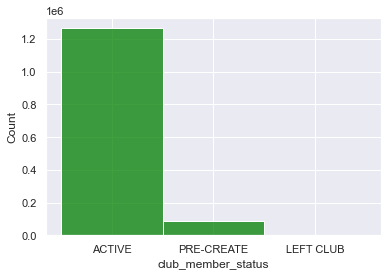

In [17]:
#how many customers have a club_membership?
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="club_member_status", data=df, color='green', bins=40)

#The biggest part of the customers have a club membership

#### 3.5 What kind of fashion news frequency is most popular with what club membership?

In [18]:
#uniting the values that all mean none but have different named values for this 
df.loc[~df['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'

In [19]:
#showing the new values for fashion news frequency
df['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

In [20]:
#the club_member_status against the fashion news frequency
pd.crosstab(df['club_member_status'], df['fashion_news_frequency'])

#There are no people that leave the club that have monthly news updates. 
#The people that have no news updates, which are the most people that leave the club, dont receive fashion news. 
#The most people have an active status but do not receive news updates. 

fashion_news_frequency,Monthly,None,Regularly
club_member_status,,,
ACTIVE,777,795295,470183
LEFT CLUB,0,457,7
PRE-CREATE,59,79861,5704


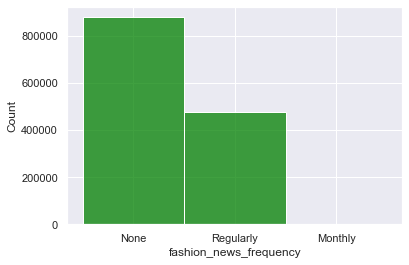

In [21]:
# division of fashion_news_frequency
sns.set_theme(style='darkgrid')
ax = sns.histplot(x="fashion_news_frequency", data=df, color='green', bins=40)

#most people don't like to receive fashion news

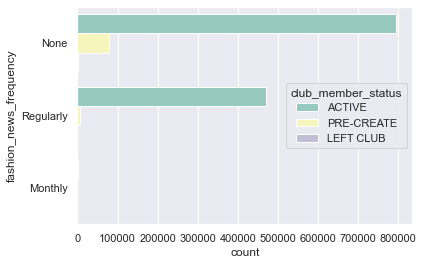

In [22]:
# A visual representation of the fashion news frequency and the club member status
fashion_status = sns.countplot(y='fashion_news_frequency', hue='club_member_status', data=df, palette="Set3")

#### 3.6 What is the relation between receiving fashion news and the customers age?

In [23]:
#fashion news in relation to age 
pd.crosstab(df['fashion_news_frequency'], df['age'], margins=True)

age,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,All
fashion_news_frequency,,,,,,,,,,,,,,,,,,,,,
Monthly,0,0,0,6,10,16,16,26,22,31,...,0,0,0,0,0,0,0,0,0,841
None,86,6405,16216,22646,33292,40891,31905,35318,37744,37778,...,12,10,4,2,8,3,3,5,8,879067
Regularly,75,2987,8107,15055,21894,26623,19948,19523,18358,17180,...,4,7,0,1,2,0,1,2,5,476211
All,161,9392,24323,37707,55196,67530,51869,54867,56124,54989,...,16,17,4,3,10,3,4,7,13,1356119


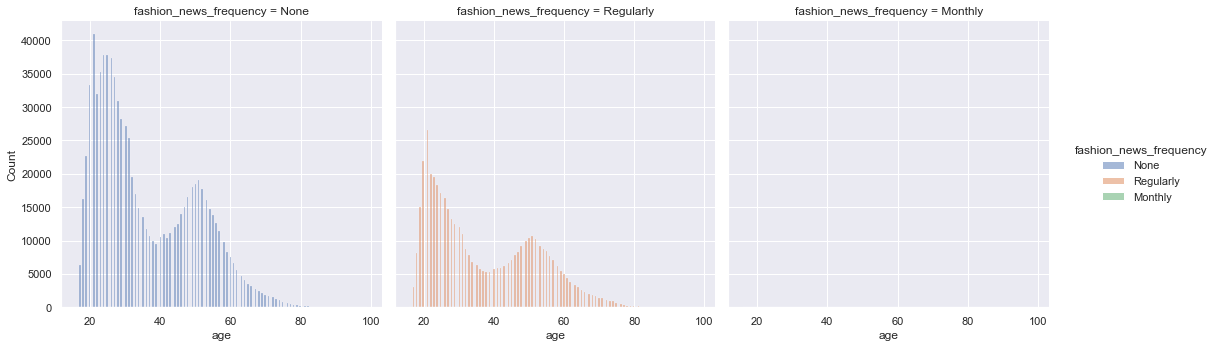

In [24]:
#fashion news frequency in relation to age 
sns.displot(data=df, x="age", hue="fashion_news_frequency", col="fashion_news_frequency")

#the highest amount of customers don't receive fashion news
#There are almost no people that receive fashion news monthly

### 4. Exploring H&M's dataset sales to figure out the latest trends
This section will try to answer the following questions:
1. What are the most sold articles?
   - What is the most sold article?
2. What are the most sold types of articles?
3. What are the worst selling articles?
   - What is the least sold article?
4. What are the worst selling types of articles?
5. What color is the most popular?
6. What was the most succesful week in sales?
7. Do expensive (categories) sell better than cheaper articles? 

In [25]:
# This loads the reduced transaction (sales) dataset.
customers = pd.read_csv('data/customers.csv', low_memory=False)
articles = pd.read_csv('data/articles.csv', low_memory=False)
transactions = pd.read_csv('data/transactions_reduced.csv', low_memory=False)

#### 4.1 What are the most sold articles?

In [26]:
# What are the most sold articles?
transactions["article_id"].value_counts().head(10)

751471001    4037
918292001    3552
706016001    3471
448509014    2948
751471043    2939
915526001    2936
916468003    2769
896152002    2728
915529003    2697
866731001    2561
Name: article_id, dtype: int64

#### 4.2 What is the most sold article?

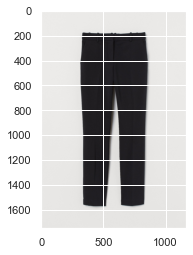

In [27]:
# The most sold article
import os
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(os.getcwd()+'/photos/'+str(751471001).zfill(10)+'.jpg')
imgplot = plt.imshow(img)
plt.show()

# The most sold article is a pair of black trousers.

#### 4.3 What are the most sold types of articles?

Text(0, 0.5, 'Amount of sales')

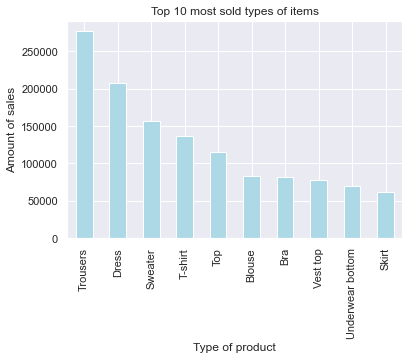

In [28]:
# What are the most sold types of articles?
df = pd.merge(transactions,articles, on="article_id", how="inner")
df["product_type_name"].value_counts().head(10).plot.bar(color="lightblue")

plt.title("Top 10 most sold types of items")
plt.xlabel("Type of product")
plt.ylabel("Amount of sales")

# The most sold type of item appear to be trousers.

In [29]:
# What are the worst selling articles?
transactions['article_id'].value_counts().tail(10)

# These are 10 of the worst selling items in the transactions file.
# Of course there will also be items that aren't sold at all.
# These articles understandably don't appear in the transaction file.
# The amount of articles without sales will most likely be far too many to give as a reasonable output.
# Therefore we have decided to not consider items with 0 sales.

738675001    1
786101003    1
733753001    1
738572002    1
549914003    1
642230006    1
778833003    1
689389052    1
679687028    1
865792012    1
Name: article_id, dtype: int64

#### 4.4 What are the least sold articles?

Object `article` not found.


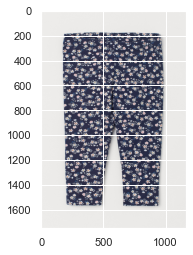

In [30]:
# One of the least sold articles
import os
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(os.getcwd()+'/photos/'+str(865792012).zfill(10)+'.jpg')
imgplot = plt.imshow(img)
plt.show()What is the least sold article?

#### 4.5 What are the worst selling types of articles?

Text(0, 0.5, 'Amount of sales')

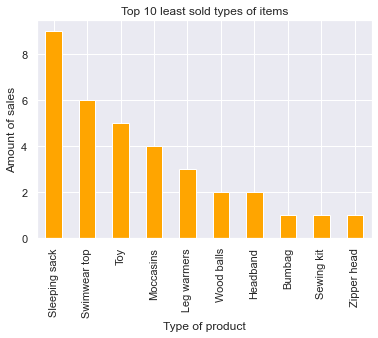

In [31]:
# What are the least sold types of articles?
df = pd.merge(transactions,articles, on="article_id", how="inner")
df["product_type_name"].value_counts().tail(10).plot.bar(color="orange")

plt.title("Top 10 least sold types of items")
plt.xlabel("Type of product")
plt.ylabel("Amount of sales")

# The least sold types of item appear to be the zipper head, sewing kit and bumbag.

#### 4.6 What color is the most popular?

Text(0, 0.5, 'Amount of sales')

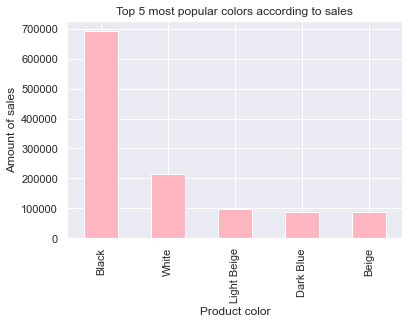

In [32]:
# What color is the most popular?
df = pd.merge(transactions,articles, on="article_id", how="inner")
df["colour_group_name"].value_counts().head(5).plot.bar(color="lightpink")

plt.title("Top 5 most popular colors according to sales")
plt.xlabel("Product color")
plt.ylabel("Amount of sales")

# It turns out that black is by far the most popular color.

#### 4.7 What was the most succesful week in sales?

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_4844/1624348371.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  week = transactions['t_dat'].dt.week


Text(0, 0.5, 'Amount of sales')

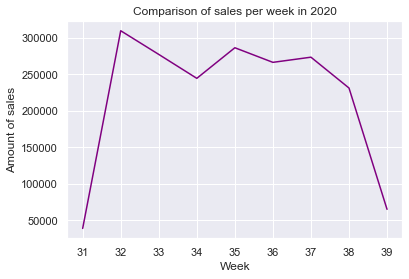

In [33]:
# How do the weekly sales compare?
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'], errors ='coerce') 
week = transactions['t_dat'].dt.week
week.value_counts(sort=False).plot(color="purple")

plt.title("Comparison of sales per week in 2020")
plt.xlabel("Week")
plt.ylabel("Amount of sales")

# Week 32 was the most succesful in sales.
# This week lasted from the 3rd until the 9th of August 2020.

### 5. Exploring H&M's dataset to build a reccomendation system
#### Building a item based reccomendation system (using cosine similarity)
In this chapter we will be using an item based collaborative filtering approach to reccomending items to users. The item reccomendations can be used to reccomend other items to users when they are shopping for products. The main idea is to find products that are frequently bought together.

We first start by reducing the dataset even more. The current appoach of using cosine similarity could not be used on the intire dataset since the matrix would become to large to fit into memory. We reduced the dataset to only contain data after 09/01/2020 and selected the first 20 000 items that users bought in h&m stores. This does probably impact accuracy, since a lot of previous transactional data is not taken into account.  

Used sources for this chapter:
* https://heartbeat.comet.ml/recommender-systems-with-python-part-i-content-based-filtering-5df4940bd831
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
* https://en.wikipedia.org/wiki/Cosine_similarity
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
* https://www.datasource.ai/uploads/6b86b1630562b323a26143f90d97fe08.html

In [34]:
customers = pd.read_csv('data/customers.csv', low_memory=False)
articles = pd.read_csv('data/articles.csv', low_memory=False)
transactions = pd.read_csv('data/transactions_reduced.csv', low_memory=False)

In [35]:
# Reducing the dataset even further
articles = pd.read_csv('data/articles.csv', low_memory=False)
transactions = pd.read_csv('data/transactions_reduced.csv', low_memory=False)
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
mask = transactions['t_dat'] > '09-01-2020'
transactions = transactions.loc[mask]
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
1233294,2020-09-02,0001f8cef6b9702d54abf66fd89eb21014bf98567065a9...,820671001,0.016932,1
1233295,2020-09-02,0006bfcec82c6c132276c0a5549ae13645c9ab77b0243f...,882354001,0.015237,2
1233296,2020-09-02,0006bfcec82c6c132276c0a5549ae13645c9ab77b0243f...,817354001,0.025407,2
1233297,2020-09-02,0006bfcec82c6c132276c0a5549ae13645c9ab77b0243f...,817354001,0.025407,2
1233298,2020-09-02,000ed4cabda96069b547ae531c66de5f1bf6a7e5b83aa8...,899002003,0.010153,1


In [36]:
# Selecting only relevant data and count how many articles customers have bought
collaborative_filtering_df = transactions[['customer_id', 'article_id']]
collaborative_filtering_df = collaborative_filtering_df.groupby(['article_id', 'customer_id']).size().reset_index()
collaborative_filtering_df = collaborative_filtering_df.set_axis(['article_id', 'customer_id', 'quantity'], axis=1, inplace=False).sort_values(by=['customer_id'])
collaborative_filtering_df.head()

,article_id,customer_id,quantity
41916,568601043,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,1
213512,794321007,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,1
15137,448509014,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1
123249,719530003,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,1
87922,685814001,000172a9c322560c849754ffbdfdb2180d408aa7176b94...,3


In [37]:
# Select only first 20 000 rows of data and represent previously reduced data as a matrix
customer_article_matrix = collaborative_filtering_df[:20000].pivot_table(
    index='customer_id',
    columns='article_id',
    values='quantity',
    aggfunc='sum')

customer_article_matrix

article_id,111565001,111586001,111593001,123173001,129085001,130035001,146730001,148033001,153115020,153115043,...,946748003,946764002,946764003,946827001,947168001,947509001,947934001,949198001,949551001,949551002
customer_id,,,,,,,,,,,,,,,,,,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d8cd0c725276a467a2a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000172a9c322560c849754ffbdfdb2180d408aa7176b943f957804686be8e1f0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
075083cf54e37abbfb4fc5be69b8556acc14008318f0537a26b0dca44439e238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0751425041cd8f0f5975e8594d99eff7e7cbb8ad639de184bc875bdb4487b841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0751a0dcf7a097889c6086860067230972601507675e1d741b8ac61bf55785b6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Replacing the nan's with 0's and values >1 with 1's
customer_article_matrix = customer_article_matrix.fillna(0)
customer_article_matrix.where(customer_article_matrix > 0, 0, inplace=True)

In [39]:
"""
We transpose (T) in order to rotate dataframe 90 degrees to left.
We do this so that index now represents articles and columns customers.
Afterwards we apply cosine similarity to the dataset. 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html
"""

article_similarity_matrix = pd.DataFrame(cosine_similarity(customer_article_matrix.T))
article_similarity_matrix

,0,1,2,3,4,5,6,7,8,9,...,7052,7053,7054,7055,7056,7057,7058,7059,7060,7061
0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,0.500000,0.0
1,0.000000,1.000000,0.109109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.000000,0.109109,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.149071,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0
7058,0.707107,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.0,0.707107,0.0
7059,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0
7060,0.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.707107,0.0,1.000000,0.0


In [40]:
# Since column names and index names are not yet set, we set index and column names to belonging article id.
article_similarity_matrix.columns = customer_article_matrix.T.index
article_similarity_matrix['article_id'] = customer_article_matrix.T.index
article_similarity_matrix = article_similarity_matrix.set_index('article_id')

In [41]:
"""
This code only selects top 5 results and merges information from the arcticles csv to get additional information on products.
I decided to use a bikini bottom (882759003), because looking at other kaggle notebooks, I saw that bikini tops are usually bought
with a matching top. So I thought it was a good strategy to test our model.
""" 
bikini_bottom_id = int(882759003)
similar_items = article_similarity_matrix.loc[bikini_bottom_id].sort_values(ascending=False).reset_index()[1:6]
similar_items.set_axis(['article_id', 'similarity'], axis=1, inplace=False)
similar_items_detailed = pd.merge(similar_items, articles, how='inner')
similar_items_detailed

,article_id,882759003,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,882757003,0.816497,882757,Price Timeless Triangle Top,298,Bikini top,Swimwear,1010001,All over pattern,9,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,"Lined, non-wired triangle bikini top with narr..."
1,699080001,0.577350,699080,Lazer Razer Padded Wire,298,Bikini top,Swimwear,1010016,Solid,9,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,Fully lined bikini top with laser-cut edges an...
2,776237008,0.577350,776237,Shake it in Balconette,298,Bikini top,Swimwear,1010026,Other structure,9,...,Swimwear,B,Lingeries/Tights,1,Ladieswear,60,"Womens Swimwear, beachwear",1018,Swimwear,"Lined balconette bikini top with underwired, p..."
3,186262001,0.408248,186262,4p Claw,72,Hair clip,Accessories,1010016,Solid,9,...,Hair Accessories,C,Ladies Accessories,1,Ladieswear,66,Womens Small accessories,1019,Accessories,Plastic hair claws. Width 2.5 cm.
4,821152002,0.408248,821152,Danderyd polo,252,Sweater,Garment Upper body,1010016,Solid,22,...,Knitwear,A,Ladieswear,1,Ladieswear,11,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine-knit viscose blend with..."


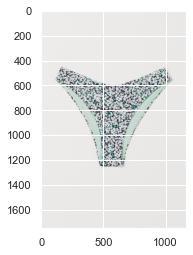

In [42]:
# This code displays the article (bikini bottom) that is used to for prediction 
import os
img = mpimg.imread(os.getcwd()+'\\photos\\'+str(bikini_bottom_id).zfill(10)+'.jpg')
imgplot = plt.imshow(img)
plt.show()

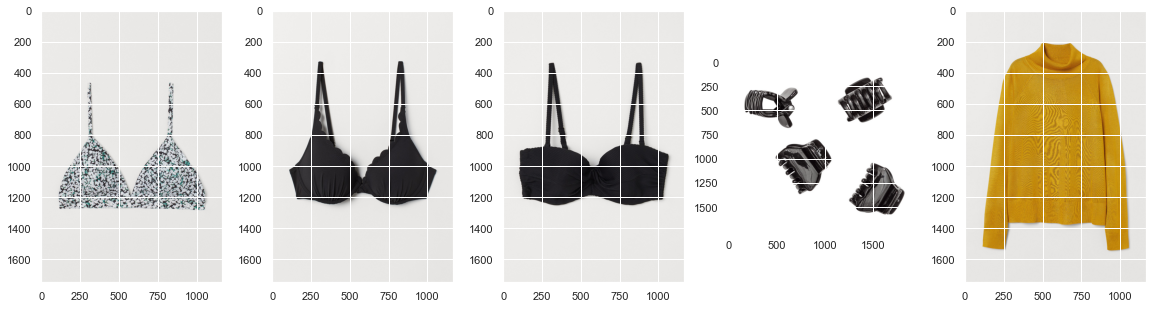

In [43]:
# These are the results for the prediction visualized.
article_ids = similar_items_detailed['article_id'].to_list()

fig = plt.figure(figsize=(20, 5))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = mpimg.imread(os.getcwd()+'\\photos\\'+str(article_ids[i-1]).zfill(10)+'.jpg')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

As we can see, the method shows promising results for this clothing item. It reccomends the matching bikini top and shows alternative tops that are usually bought. It also reccomends hair clips which surprisingly people buy as well while shopping for bikini bottoms. This method needs to be further investigated and evaluated before it can be implemented. It also needs more thinking on how it can be implented efficiently, but I think this is out of scope for this assingment.